In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

df = pd.merge(city_data, ride_data, how="left", on=["city"])
# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#city_data.head()

In [3]:
#ride_data.head()

In [4]:
# Obtain the x coordinates for each of the three city types

by_city_count = df.groupby(["city"]).count()
x = by_city_count["driver_count"] 
x.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: driver_count, dtype: int64

In [5]:
# Obtain the y coordinates for each of the three city types
by_city_sum = df.groupby(["city"]).sum()
y = by_city_sum["fare"] / x
y.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
dtype: float64

In [6]:
by_city_mean = df.groupby(["city"]).mean()
z = by_city_mean["driver_count"]

In [7]:
by_city_sort = df.groupby(["city"]).first()
v = by_city_sort["type"]

In [8]:
# Build the scatter plots for each city types
new_df = pd.DataFrame({
    "Total Number of Rides (Per City)": x,
    "Average Fare ($)": y,
    "Driver Count Per City": z,
    "City Type": v
})

new_df.head()


,Total Number of Rides (Per City),Average Fare ($),Driver Count Per City,City Type
city,,,,
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Bradshawfurt,10,40.064000,7.0,Rural


In [9]:
new_df['Color'] = new_df['City Type']
new_df.head()

,Total Number of Rides (Per City),Average Fare ($),Driver Count Per City,City Type,Color
city,,,,,
Amandaburgh,18,24.641667,12.0,Urban,Urban
Barajasview,22,25.332273,26.0,Urban,Urban
Barronchester,16,36.422500,11.0,Suburban,Suburban
Bethanyland,18,32.956111,22.0,Suburban,Suburban
Bradshawfurt,10,40.064000,7.0,Rural,Rural


In [10]:
new_df.loc[new_df['City Type'] == 'Urban', 'Color'] = 'Coral'
new_df.loc[new_df['City Type'] == 'Suburban', 'Color'] = 'SkyBlue'
new_df.loc[new_df['City Type'] == 'Rural', 'Color'] = 'Gold'
new_df.head()

,Total Number of Rides (Per City),Average Fare ($),Driver Count Per City,City Type,Color
city,,,,,
Amandaburgh,18,24.641667,12.0,Urban,Coral
Barajasview,22,25.332273,26.0,Urban,Coral
Barronchester,16,36.422500,11.0,Suburban,SkyBlue
Bethanyland,18,32.956111,22.0,Suburban,SkyBlue
Bradshawfurt,10,40.064000,7.0,Rural,Gold


In [11]:
w = new_df["Color"]
w.head()

city
Amandaburgh        Coral
Barajasview        Coral
Barronchester    SkyBlue
Bethanyland      SkyBlue
Bradshawfurt        Gold
Name: Color, dtype: object

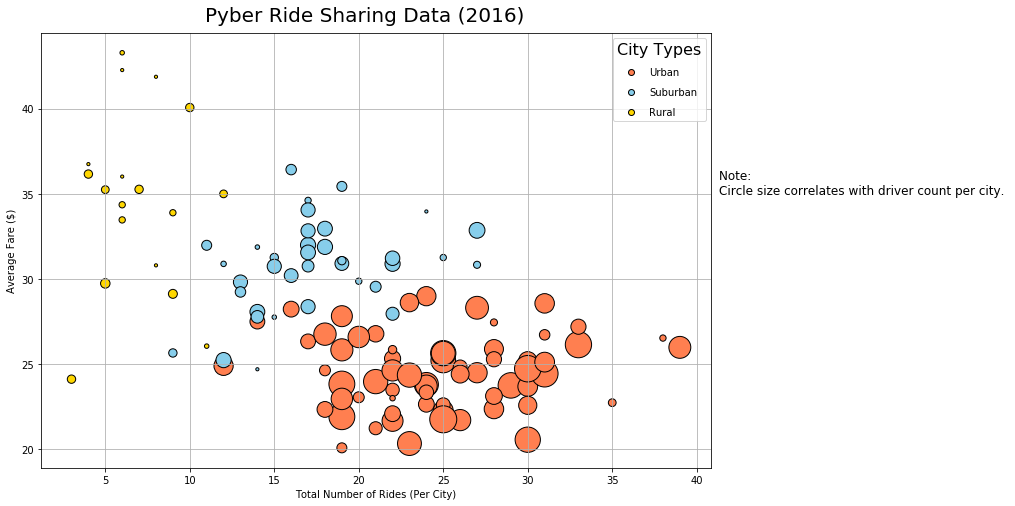

In [12]:
# Creating the plot

plot = new_df.plot(kind = "scatter", x = "Total Number of Rides (Per City)", y = "Average Fare ($)", grid = True, figsize = (12,8),
              title = False, c = w, edgecolors = "black", s = z*10)


# Creating the appropriate Legend by plotting blank scatterplots

for city_type in ["Urban"]:
    plt.scatter([], [], c= ["Coral"], label= city_type, edgecolors = "black")
    
for city_type in ["Suburban"]:
    plt.scatter([], [], c= ["SkyBlue"], label= city_type, edgecolors = "black")

for city_type in ["Rural"]:
    plt.scatter([], [], c= ["Gold"], label= city_type, edgecolors = "black")
    
    
legend = plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='City Types')  
legend.get_title().set_fontsize('16')

# Making the note

textstr = "Note: \nCircle size correlates with driver count per city. "
plt.text(.91, .6, textstr, fontsize=12, transform=plt.gcf().transFigure)

# Setting title this way to change font

plt.figtext(.5,.9,'Pyber Ride Sharing Data (2016)',fontsize=20,ha='center')


plt.show(plot)


In [13]:
pyber_sum = df.groupby(["type"]).sum()
pyber_sum.head()

,driver_count,fare,ride_id
type,,,
Rural,537,4327.93,580968240341287
Suburban,8570,19356.33,3106884522576766
Urban,59602,39854.38,7919412664056093


In [14]:
rides_count = df.groupby(["type"]).count()
rides_count.head()

,city,driver_count,date,fare,ride_id
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


In [15]:
#fares_count = df.groupby(["type"]).sum()
#fares_count.head()

In [16]:
# The values of each section of the pie chart
sizes_fares = pyber_sum["fare"]
sizes_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [17]:
# The values of each section of the pie chart
sizes_rides = rides_count["city"]
sizes_rides

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

In [18]:
# The values of each section of the pie chart
#sizes_drivers = df
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [19]:
# using the sorted-by-city (used to find v above), create a sorted by city dataframe
newdf = pd.DataFrame(by_city_sort)
newdf.head()

,driver_count,type,date,fare,ride_id
city,,,,,
Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
Barajasview,26,Urban,2018-01-15 02:59:07,19.52,8268107272481
Barronchester,11,Suburban,2018-01-27 03:08:01,27.79,6653622887913
Bethanyland,22,Suburban,2018-04-01 22:04:35,38.71,8221076873967
Bradshawfurt,7,Rural,2018-03-06 21:44:53,19.74,6080367372860


In [20]:
# calculating number of drivers in urban cities
urban_counts = newdf.loc[newdf['type'] == 'Urban', ['driver_count']]
num_urb = urban_counts['driver_count'].sum()
num_urb

2405

In [21]:
# calculating number of drivers in suburban cities
suburban_counts = newdf.loc[newdf['type'] == 'Suburban', ['driver_count']]
num_sub = suburban_counts['driver_count'].sum()
num_sub

490

In [22]:
# calculating number of drivers in rural cities
rural_counts = newdf.loc[newdf['type'] == 'Rural', ['driver_count']]
num_rur = rural_counts['driver_count'].sum()
num_rur

78

In [23]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

In [24]:
# The colors of each section of the pie chart
colors = ["gold", "skyblue", "coral"]

In [25]:
# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.2)

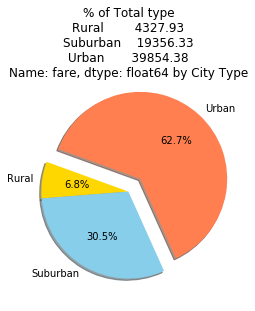

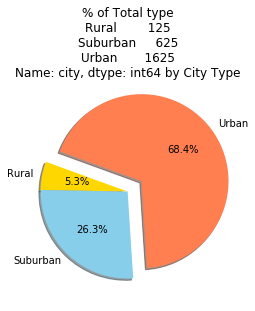

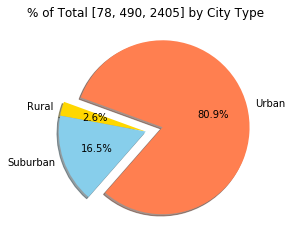

In [27]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

for sizes in [sizes_fares, sizes_rides, [num_rur, num_sub, num_urb]]:
    

    plot = plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
                       autopct="%1.1f%%", shadow=True, startangle=160)
    
    plt.title(f'% of Total {sizes} by City Type')
    plt.show(plot)
    


        

